In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
data = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

Questions:
1. Display Top 5 Rows of The Dataset
2. Check the Last 3 Rows of The Dataset
3. Find Shape of Our Dataset (Number of Rows & Number of Columns)
4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Get Overall Statistics About The Dataframe
6. Total Number of App Titles Contain Astrology
7. Find Average App Rating
8.  Find Total Number of Unique Category
9. Which Category Getting The Highest Average Rating?
10. Find Total Number of App having 5 Star Rating
11. Find Average Value of Reviews
12. Find Total Number of Free and Paid Apps
13.  Which App Has Maximum Reviews?
14. Display Top 5 Apps Having Highest Reviews
15. Find Average Rating of Free and Paid Apps
16. Display Top  5 Apps Having Maximum Installs


In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
data.shape

(10841, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
# Total Number of App Titles Contain Astrology
data["App"].str.contains("Astrology")

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840     True
Name: App, Length: 10841, dtype: bool

In [9]:

data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
# Find Average App Rating
data["Rating"].mean()

4.193338315362443

In [11]:
#Find Total Number of Unique Category

data["Category"].nunique()

34

In [12]:
#Which Category Getting The Highest Average Rating?
data.groupby("Category")["Rating"].mean().sort_values()

Category
DATING                  3.970769
TOOLS                   4.047411
MAPS_AND_NAVIGATION     4.051613
VIDEO_PLAYERS           4.063750
LIFESTYLE               4.094904
TRAVEL_AND_LOCAL        4.109292
BUSINESS                4.121452
ENTERTAINMENT           4.126174
FINANCE                 4.131889
NEWS_AND_MAGAZINES      4.132189
COMICS                  4.155172
COMMUNICATION           4.158537
FOOD_AND_DRINK          4.166972
LIBRARIES_AND_DEMO      4.178462
MEDICAL                 4.189143
AUTO_AND_VEHICLES       4.190411
PHOTOGRAPHY             4.192114
FAMILY                  4.192272
HOUSE_AND_HOME          4.197368
PRODUCTIVITY            4.211396
SPORTS                  4.223511
WEATHER                 4.244000
SOCIAL                  4.255598
SHOPPING                4.259664
HEALTH_AND_FITNESS      4.277104
BEAUTY                  4.278571
GAME                    4.286326
PARENTING               4.300000
PERSONALIZATION         4.335987
BOOKS_AND_REFERENCE     4.346067
A

In [13]:
#Find Total Number of App having 5 Star Rating
len(data[data["Rating"] == 5])
data[data["Rating"] == 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100+,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,"1,000+",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


In [14]:
# Find Average Value of Reviews
data[data["Reviews"] == "3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
data["Reviews"] = data["Reviews"].replace("3.0M", 3.0)

In [16]:
data["Reviews"] = data["Reviews"].astype("float")
data["Reviews"].mean()

444111.9265750392

In [17]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
#Find Total Number of Free and Paid Apps

data["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [19]:
#Which App Has Maximum Reviews?
max_reviews = data["Reviews"].idxmax()
app_name = data.loc[max_reviews, "App"]
print("The app with maximum reviews is:", app_name)


The app with maximum reviews is: Facebook


In [20]:
# Display Top 5 Apps Having Highest Reviews
top_5_apps = data.nlargest(5, "Reviews").drop_duplicates()
top_5_apps


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [21]:
#Find Average Rating of Free and Paid Apps
data.groupby("Type")["Rating"].mean()

Type
0       19.000000
Free     4.186203
Paid     4.266615
Name: Rating, dtype: float64

In [22]:
#Display Top 5 Apps Having Maximum Installs
top_5_apps = data[['App', 'Installs']].sort_values('Installs', ascending=False).head(5)
print(top_5_apps)

                                               App      Installs
10472      Life Made WI-Fi Touchscreen Photo Frame          Free
420    UC Browser - Fast Download Private & Secure  500,000,000+
474                    LINE: Free Calls & Messages  500,000,000+
3767                  Flipboard: News For Our Time  500,000,000+
3574                                   Cloud Print  500,000,000+


In [23]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

* Explore the distribution of app categories using a bar chart or a pie chart.
* Analyze the correlation between the app rating and the number of installs using a scatter plot.
* Investigate the relationship between app size and the type of app (free vs paid) using a box plot or a violin plot.
* Calculate the average rating for each content rating category (e.g., Everyone, Teen, Mature 17+) and compare them using a bar chart.
* Compare the average price of paid apps in different categories using a bar chart or a box plot.
* Analyze the frequency of app updates by plotting a histogram of the time between the last update and the current date.
* Group the apps by genre and calculate the average rating and number of installs for each genre.
* Analyze the relationship between app size and the number of reviews using a scatter plot.
* Compare the average rating of paid apps and free apps using a box plot.
* Investigate the relationship between the price and the number of installs using a scatter plot.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

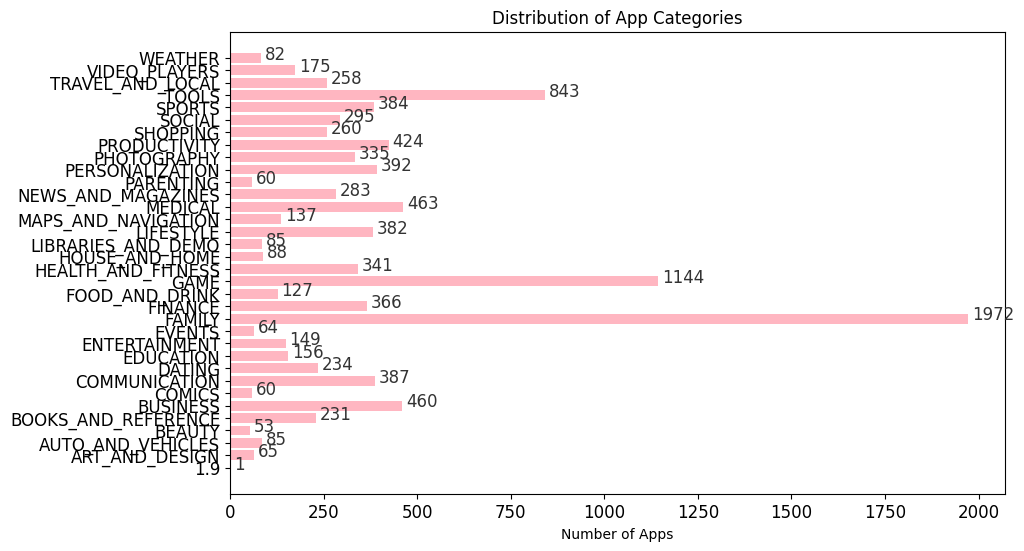

In [34]:
# Explore the distribution of app categories using a bar chart or a pie chart.
category_counts = data.groupby("Category")["App"].size()
# create a bar chart
#category_counts.plot(kind='pie', title='App Categories')


fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(category_counts.index, category_counts.values, color='#FFB6C1')
ax.set_xlabel('Number of Apps')
ax.set_title('Distribution of App Categories')
ax.tick_params(axis='both', which='major', labelsize=12)

# add value labels to the bars
for i, v in enumerate(category_counts.values):
    ax.text(v + 10, i - 0.1, str(v), color='#333333', fontsize=12)

plt.show()

In [55]:
# Investigate the relationship between app size and the type of app (free vs paid) using a box plot or a violin plot.
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [60]:
data['Size'].replace('Varies with device', np.nan, inplace=True)

app_data = data[['Size', 'Type']]

# remove rows with missing data
app_data = app_data.dropna()

In [64]:
app_data['Size'] = pd.to_numeric(app_data['Size'].apply(lambda x: x.replace('M', '').replace("k", "").replace("+", "").replace(',', '')))


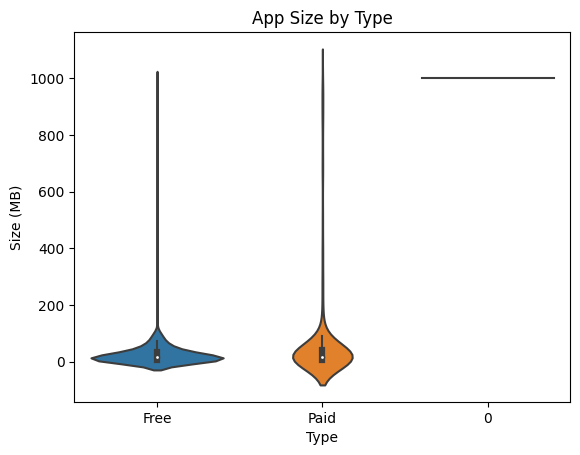

In [68]:
import seaborn as sns

sns.violinplot(x='Type', y='Size', data=app_data)
# set plot title and axis labels
plt.title('App Size by Type')
plt.xlabel('Type')
plt.ylabel('Size (MB)')

# display plot
plt.show()

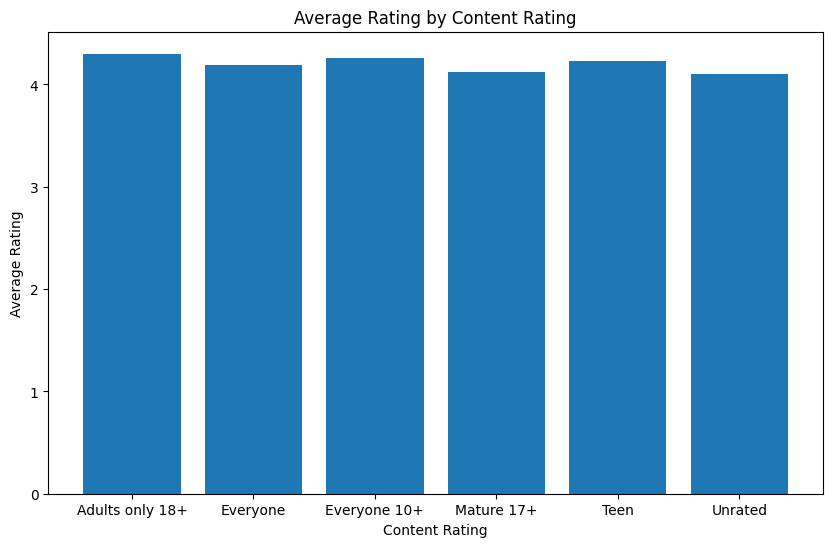

In [76]:
# Calculate the average rating for each content rating category 
#(e.g., Everyone, Teen, Mature 17+) and compare them using a bar chart.


ratings_by_content_rating= data.groupby("Content Rating")["Rating"].mean()
plt.figure(figsize=(10,6))
plt.bar(ratings_by_content_rating.index, ratings_by_content_rating.values)
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')
plt.title('Average Rating by Content Rating')
plt.show()

In [ ]:
# Compare the average price of paid apps in different categories using a bar chart or a box plot.


<AxesSubplot: xlabel='Category'>

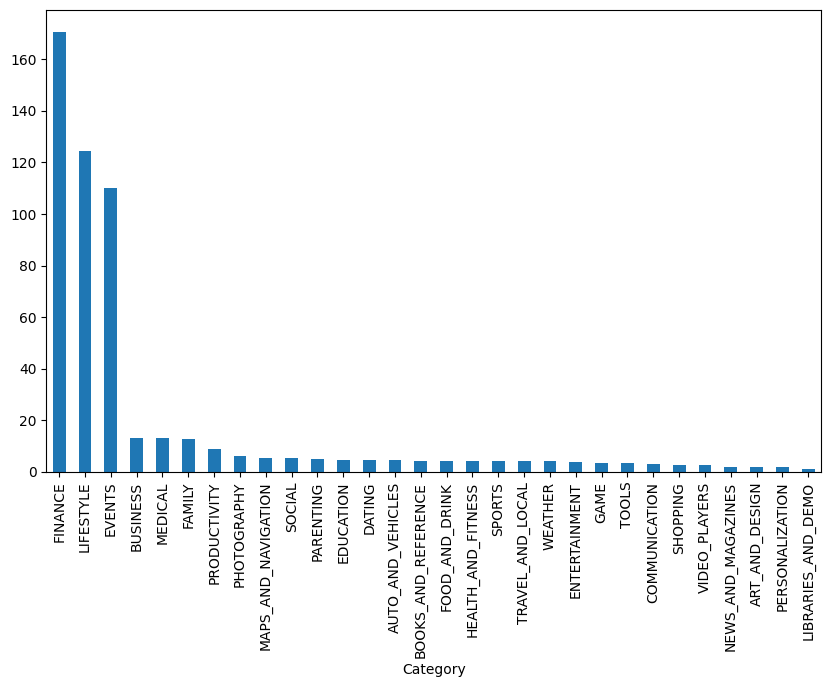

In [88]:
#data['Price'] = data['Price'].apply(lambda x: x.replace('$', '').replace(',', '') if '$' in str(x) else str(x))
#data['Price'] = data['Price'].str.replace(',', '').replace('Everyone', np.nan).astype(float)


paid_apps = data[data["Type"] == "Paid"]

avg_price_by_category = paid_apps.groupby("Category")["Price"].mean()

paid_apps = data[data['Type'] == 'Paid']
paid_apps_by_category = paid_apps.groupby('Category')['Price'].mean().sort_values(ascending=False)
paid_apps_by_category.plot(kind='bar', figsize=(10,6))

In [102]:
#Investigate the relationship between the price and the number of installs using a scatter plot.

data["Installs"] = data["Installs"].str.replace(",","").str.replace('+', '').replace("Free", np.nan).replace("+", "").astype(float)

/tmp/ipykernel_34/3176034679.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = data["Installs"].str.replace(",","").str.replace('+', '').replace("Free", np.nan).replace("+", "").astype(float)


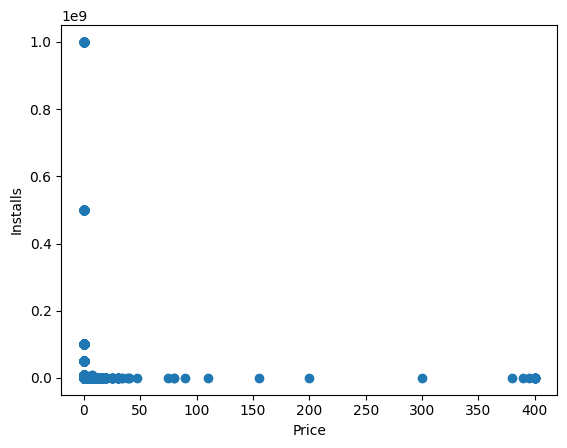

In [103]:
plt.scatter(data['Price'], data['Installs'])
plt.xlabel('Price')
plt.ylabel('Installs')
plt.show()